In [11]:
!pip install trax

DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

In [12]:
!pip install wordcloud
!pip install Pillow==9.5.0
!pip install --upgrade pip
!pip install textblob


DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

In [13]:
!pip install nltk

DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

In [14]:
!python --version

Python 3.8.8


In [15]:
!pip install mlxtend

DEPRECATION: arcgis 1.9.1 has a non-standard dependency specifier keyring<=21.8.*,>=19. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of arcgis or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: celery 5.1.0 has a non-standard dependency specifier pytz>dev. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of celery or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version num

### 1. Installing all libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import re
#import trax
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import plotly.express as px
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_learning_curves
from sklearn.preprocessing import LabelEncoder


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from nltk.stem import WordNetLemmatizer, SnowballStemmer

In [18]:
from xgboost import XGBClassifier

### 2. Importing CSV data

In [19]:
df_test = pd.read_csv("/Users/shritej/Documents/GitHub/archive/drugsComTest_raw.csv")
df_train = pd.read_csv("/Users/shritej/Documents/GitHub/archive/drugsComTrain_raw.csv")

print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

df_train.head()



The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

### 3. Data Preprocessing

In [20]:
df_test.head()

uniqueID         drugName                     condition  \
0    163740      Mirtazapine                    Depression   
1    206473       Mesalamine  Crohn's Disease, Maintenance   
2    159672          Bactrim       Urinary Tract Infection   
3     39293         Contrave                   Weight Loss   
4     97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating       date  \
0  "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                      "Quick reduction of symptoms"       9  29-Sep-17   
3  "Contrave combines drugs that were used for al...       9  05-Mar-17   
4  "I have been on this birth control for one cyc...       9  22-Oct-15   

   usefulCount  
0           22  
1           17  
2            3  
3           35  
4            4

In [21]:

data=pd.concat([df_train,df_test])
data.shape

(215063, 7)

In [22]:
data.sample(100)

uniqueID                                           drugName  \
87244     24516         Polyethylene glycol 3350 with electrolytes   
32092    213050                                         Tizanidine   
6883      11259  Drospirenone / ethinyl estradiol / levomefolat...   
83880    192490                   Drospirenone / ethinyl estradiol   
42322     19295                                         Pregabalin   
...         ...                                                ...   
70909     37516                                            Vyvanse   
2467     226167                                           Remicade   
22199     28001                                            Lexapro   
57976     99829  Magnesium sulfate / potassium sulfate / sodium...   
26592     89914                                          Risperdal   

                            condition  \
87244               Bowel Preparation   
32092               Cluster Headaches   
6883                    Birth Control   
83880  Premenstrual Dysphoric Disorde   
42322     Generalized Anxiety Disorde   
...                               ...   
70909                            ADHD   
2467              Psoriatic Arthritis   
22199                         Anxiety   
57976               Bowel Preparation   
26592                   Schizophrenia   

                                                  review  rating       date  \
87244  "I wished I hadn&#039;t visited this page befo...       9  14-Feb-16   
32092  "I suffer with chronic cluster headaches. I no...       7  04-Jan-09   
6883   "I just finished my first pack. The pros: I&#0...       6  28-Jun-11   
83880  "Before Yaz I was very moody almost bipolar an...      10  19-Jun-13   
42322  "I was prescribed this poison to help get off ...       1  10-Jun-16   
...                                                  ...     ...        ...   
70909  "Vyvance is the 4th medicine we&#039;ve tried ...       9  29-Dec-11   
2467   "I had my first infusion last week and within ...      10  29-Sep-13   
22199  "Escitalopram has helped me tremendously with ...      10  04-Apr-16   
57976  "It has been 15 years since my last colonoscop...       9   1-May-16   
26592  "I smoked a lot of marijuana as a young man. M...       9  21-Jan-12   

       usefulCount  
87244            5  
32092           25  
6883            14  
83880           43  
42322           34  
...            ...  
70909           21  
2467            22  
22199           55  
57976           11  
26592           79  

[100 rows x 7 columns]

In [23]:
data.describe

<bound method NDFrame.describe of        uniqueID                  drugName                     condition  \
0        206461                 Valsartan  Left Ventricular Dysfunction   
1         95260                Guanfacine                          ADHD   
2         92703                    Lybrel                 Birth Control   
3        138000                Ortho Evra                 Birth Control   
4         35696  Buprenorphine / naloxone             Opiate Dependence   
...         ...                       ...                           ...   
53761    159999                 Tamoxifen     Breast Cancer, Prevention   
53762    140714              Escitalopram                       Anxiety   
53763    130945            Levonorgestrel                 Birth Control   
53764     47656                Tapentadol                          Pain   
53765    113712                 Arthrotec                      Sciatica   

                                                  review  rating 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [25]:
data.isnull().any()

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [26]:
#Null Value
print ("Null values in the dataset : ", data.isnull().sum(axis = 0))

Null values in the dataset :  uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [27]:
# Calculating what percentage of data is null
size = data.shape[0]

print ("Total Size of the dataset : ", size)

total_na = data.isnull().sum(axis = 0)['condition']
print ("Null values : ", total_na)

print ("PERCENTAGE : ", (total_na/size)*100)

Total Size of the dataset :  215063
Null values :  1194
PERCENTAGE :  0.5551861547546533


In [28]:
data = data.dropna(how = 'any', axis = 0)

print ("The shape of the dataset after null values removal :", data.shape)

The shape of the dataset after null values removal : (213869, 7)


In [29]:
data.columns = data.columns.str.lower()

In [30]:
data.sort_values(['uniqueid'], ascending = True, inplace = True)
data.reset_index(drop = True, inplace = True)
data.head(10)

uniqueid             drugname                  condition  \
0         0  Medroxyprogesterone  Abnormal Uterine Bleeding   
1         2  Medroxyprogesterone                 Amenorrhea   
2         3  Medroxyprogesterone  Abnormal Uterine Bleeding   
3         4  Medroxyprogesterone              Birth Control   
4         5  Medroxyprogesterone  Abnormal Uterine Bleeding   
5         6  Medroxyprogesterone              Birth Control   
6         7  Medroxyprogesterone  Abnormal Uterine Bleeding   
7         8  Medroxyprogesterone  Abnormal Uterine Bleeding   
8         9  Medroxyprogesterone  Abnormal Uterine Bleeding   
9        10  Medroxyprogesterone  Abnormal Uterine Bleeding   

                                              review  rating       date  \
0  "Been on the depo injection since January 2015...       3  28-Oct-15   
1  "I&#039;m 21 years old and recently found out ...      10  27-Oct-15   
2  "I have been on the shot 11 years and until a ...       8  27-Oct-15   
3  "Ive had four shots at this point. I was on bi...       9  26-Oct-15   
4  "I had a total of 3 shots. I got my first one ...       1  25-Oct-15   
5  "This is a horrible shot!! I got my first shot...       1  24-Oct-15   
6  "I&#039;m 18 and got this for heavy bleeding. ...       5  22-Oct-15   
7  "Im 19 and have been having heavy and painful ...       5  21-Oct-15   
8  "I&#039;m a 30 year old woman. I got the shot ...       2  21-Oct-15   
9  "I&#039;m 17 years old and I got shot in Augus...       7  20-Oct-15   

   usefulcount  
0            4  
1           11  
2            7  
3           12  
4            4  
5            3  
6            6  
7            2  
8            5  
9            2

In [31]:
print (data['condition'].nunique(), "\n")

916 



In [32]:
print ("some of the conditions are : ", data['condition'].unique()[0:10])

some of the conditions are :  ['Abnormal Uterine Bleeding' 'Amenorrhea' 'Birth Control' 'Endometriosis'
 'Endometrial Hyperplasia, Prophylaxis' 'Renal Cell Carcinoma'
 'Not Listed / Othe' 'Eye Redness' 'Benign Prostatic Hyperplasia' 'Acne']


In [33]:
data.loc[data['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

In [34]:
data.loc[data.usefulcount == 0, 'drugname'].value_counts()


Etonogestrel                         590
Levonorgestrel                       473
Ethinyl estradiol / norethindrone    371
Implanon                             327
Ethinyl estradiol / norgestimate     252
                                    ... 
Medium chain triglycerides             1
Efudex                                 1
Vandazole                              1
Rebif Rebidose                         1
Bactroban                              1
Name: drugname, Length: 1487, dtype: int64

In [35]:
data['rating'].min()

1

In [36]:
data['date'] = pd.to_datetime(data['date'])

### 4. Exploratory Data Analysis

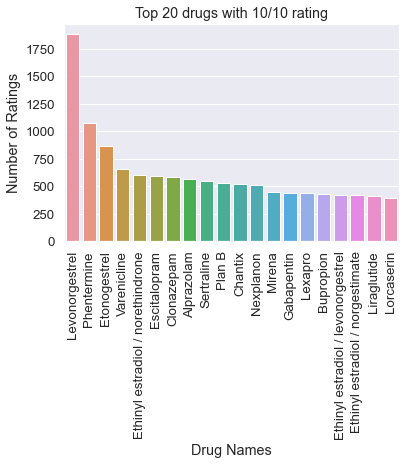

In [37]:

#This barplot shows the top 20 drugs with the 10/10 rating
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [20, 10]

rating = dict(data.loc[data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set(title = 'Top 20 drugs with 10/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);


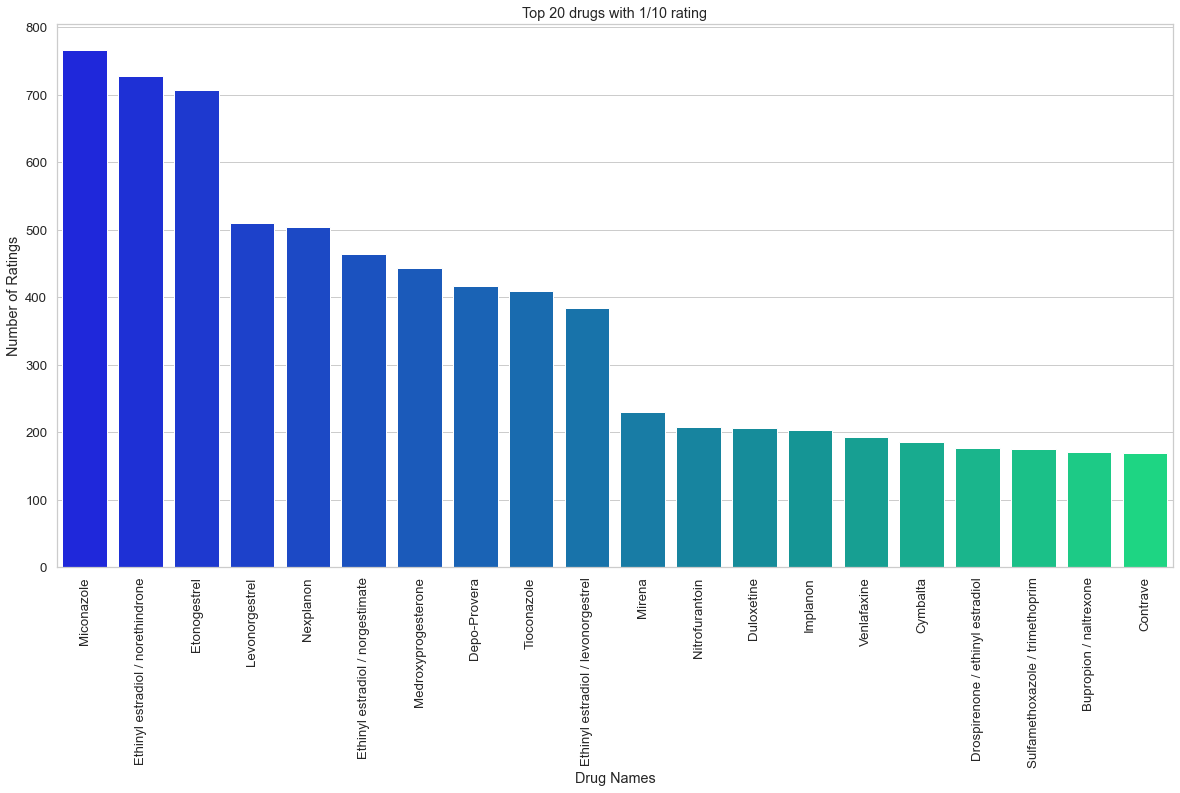

In [38]:
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [20, 10]

rating = dict(data.loc[data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set(title = 'Top 20 drugs with 1/10 rating', ylabel = 'Number of Ratings', xlabel = "Drug Names")

plt.setp(sns_rating.get_xticklabels(), rotation=90);

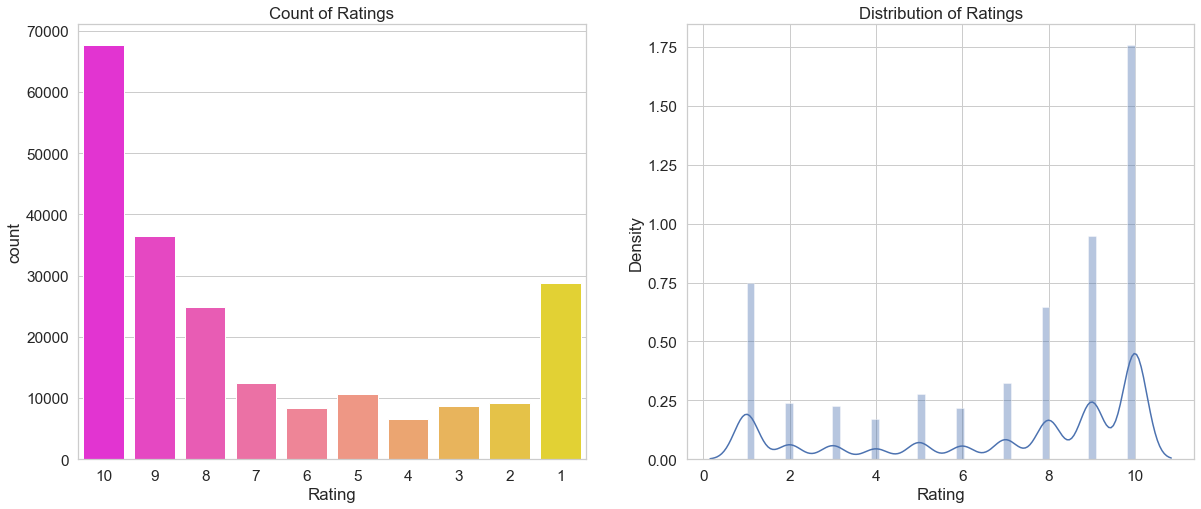

In [39]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating");

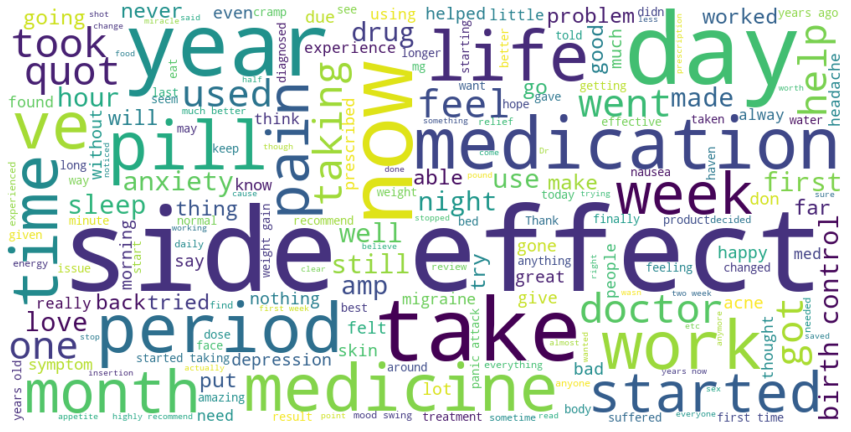

In [40]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = data.loc[data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

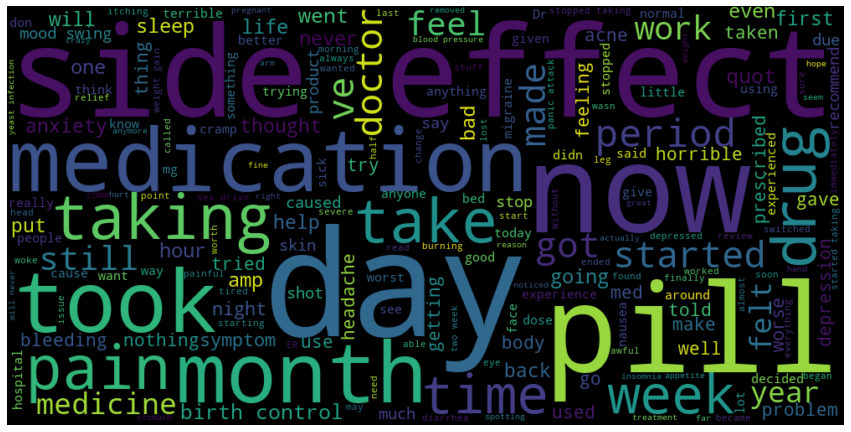

In [41]:
# Word cloud of the reviews with rating equal to 1

df_rate_one = data.loc[data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

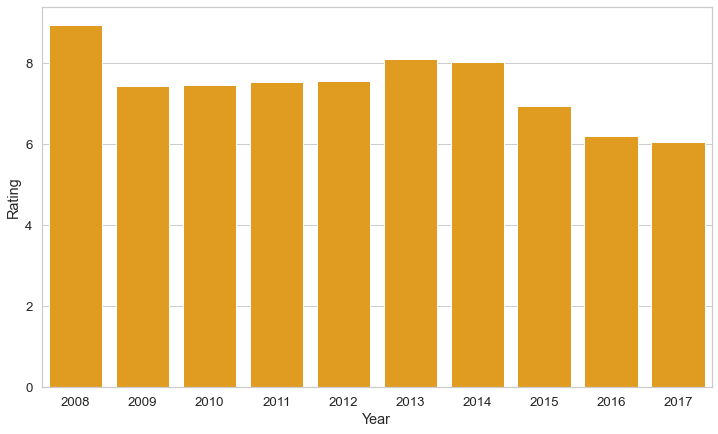

In [42]:
# This barplot shows the mean rating of the drugs per year

mean_rating = dict(data.groupby(data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'orange');
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating");

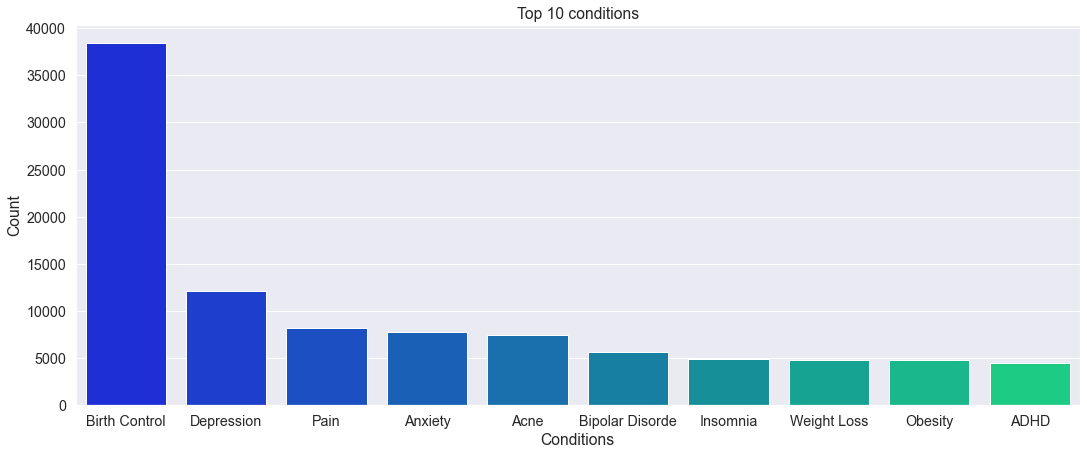

In [43]:
# This barplot show the top 10 conditions the people are suffering.

cond = dict(data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

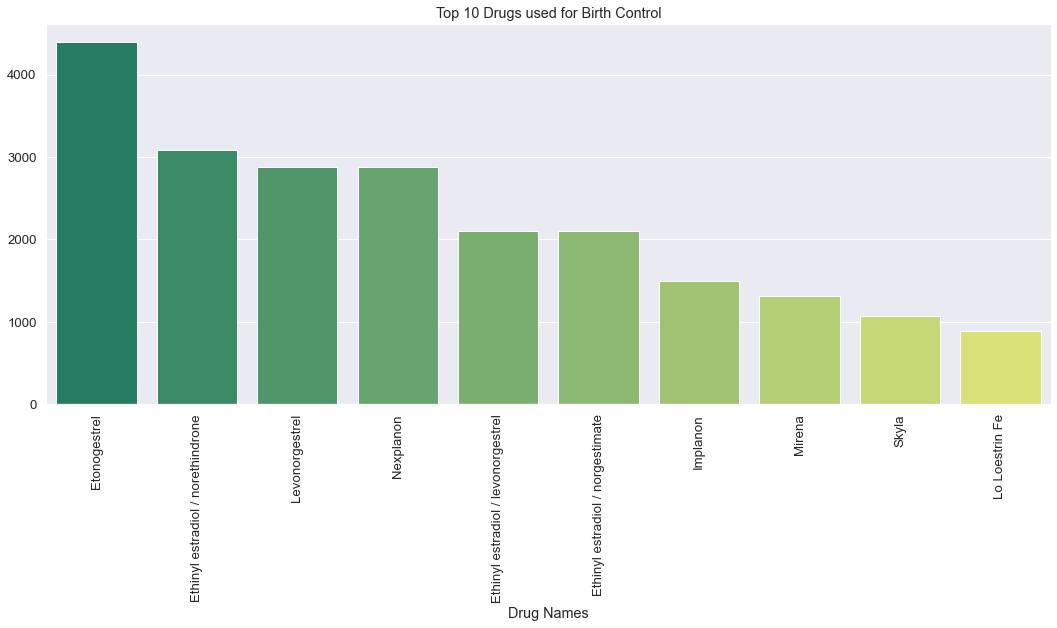

In [44]:
# Top 10 drugs which are used for the top condition, that is Birth Control

df = data[data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

<Axes: xlabel='usefulcount', ylabel='Density'>

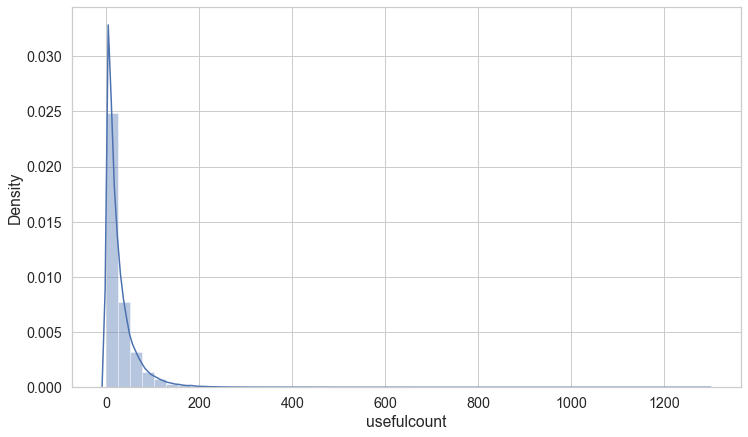

In [45]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(data['usefulcount'].dropna())

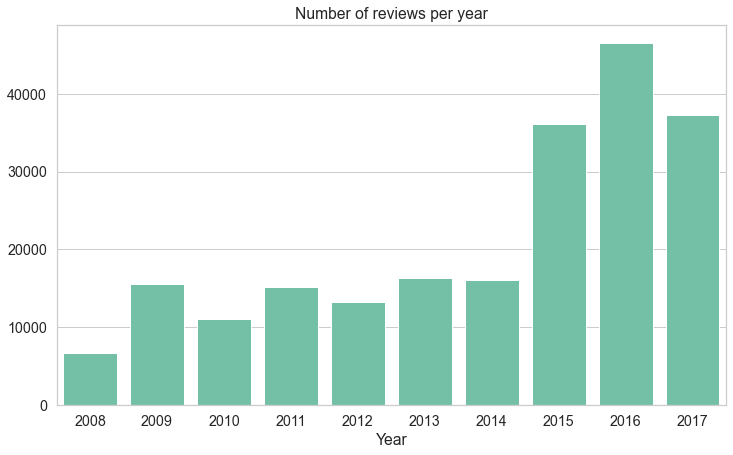

In [46]:
# This barplot shows the number of reviews per year
df = data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

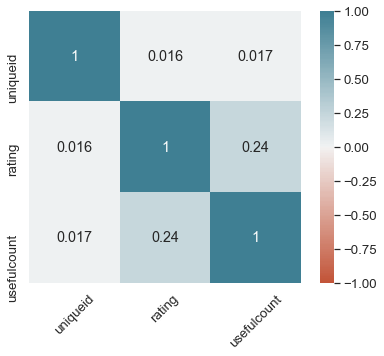

In [47]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

### Labels Preprocessing

In [48]:
def plot_bar_chart(df):
    # analyze the condition labels
    counts_series = df.condition.value_counts()
    counts_df = pd.DataFrame(counts_series)
    counts_df.reset_index(level=0, inplace=True)

    number_of_classes(df)

    fig = px.bar(counts_df, x="index", y="condition", orientation='v',
              height=400,
              title='xc')
    fig.show()

def number_of_classes(df):
    print("Number of classes: ", len(df["condition"].unique()))

### 4.Class Distribution (Here class is conditions and that particular condition have more than 20 reviews)

In [49]:
# Keeping classes which have more than 20 values in them
index_counts = df_train["condition"].value_counts()[df_train.condition.value_counts() >= 20].index
df_train = df_train[df_train["condition"].isin(index_counts)]

number_of_classes(df_train)

Number of classes:  330


In [50]:
plot_bar_chart(df_train)

Number of classes:  330


### 5. Undersampling classes with more than 200 samples ((only 200 reviews))

In [51]:
# undersampling all classes with samples greater than 200 to 200
condition_over200 = df_train["condition"].value_counts()[df_train.condition.value_counts() >= 200].index

for condition in condition_over200:
    # randomly shuffle the samples
    condition_samples = df_train[df_train["condition"]==condition]
    condition_samples = condition_samples.sample(frac=1).reset_index(drop=True)

    # extract only 200
    condition_samples = condition_samples[:200]

    df_train = df_train[df_train["condition"]!=condition]
    # put it back
    df_train = pd.concat([df_train, condition_samples], ignore_index=True)

In [52]:
plot_bar_chart(df_train)

Number of classes:  330


### 6. Filtering Labels and removing alpha numeric values

In [53]:
def filter_labels(labels):
    labels = labels.tolist()
    labels_truth = []
    for label in labels:
        #print(label)
        if label[0].isdigit():
            labels_truth.append(False)
        else:
            labels_truth.append(True)
    return labels_truth

df_train = df_train[filter_labels(df_train["condition"])]
print("Train ", number_of_classes(df_train))

Number of classes:  318
Train  None


In [54]:
plot_bar_chart(df_train)

Number of classes:  318


### 7.Dropping all NA values of test data

In [55]:
df_test.dropna(how = 'any', axis = 0, inplace = True)
df_test = df_test[filter_labels(df_test["condition"])]
print("Test ", number_of_classes(df_test))

Number of classes:  664
Test  None


### 8. Only keeping the classes that are in the training set, in to the test set

In [56]:
df_test = df_test[df_test["condition"].isin(df_train["condition"])]
number_of_classes(df_test)

Number of classes:  318


### 9.Using stopwords to focus on important words. Using stemmer to focus on the standard form of the words.

#### NLP Preprocessing on reviews: 
##### Removing stopwords and punctuations
##### Stemming using Snowball Stemmer algorithm 

In [57]:
import string
nltk.download('stopwords')
def filter_data(reviews):
  
  """
  Filter the corpus of training and testing df.
  This function removes stop and stem words from the corpus
  :param reviews:
  :return:
  """
  stop = stopwords.words('english')
  stemmer = SnowballStemmer("english")

  # remove punctuations
  series = reviews.str.replace('[{}]'.format(string.punctuation), '')

  # remove stop words
  series = series.apply(
      lambda x: ' '.join([word for word in x.split() if word not in stop]))

  # remove stem words
  series = series.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

  return series
    
df_train["review"] = filter_data(df_train["review"]).str.lower()
df_test["review"] = filter_data(df_test["review"]).str.lower()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shritej/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
df_train

uniqueID        drugName                     condition  \
0        191290         Pentasa               Crohn's Disease   
1        119705       Nilotinib  Chronic Myelogenous Leukemia   
2        206180    Eflornithine                     Hirsutism   
3        206444        Trilafon                     Psychosis   
4        215018          Opdivo     Non-Small Cell Lung Cance   
...         ...             ...                           ...   
36354    156860  Transderm-Scop               Motion Sickness   
36355    175389     Scopolamine               Motion Sickness   
36356    177076    Promethazine               Motion Sickness   
36357     56853       Meclizine               Motion Sickness   
36358    212635       Phenergan               Motion Sickness   

                                                  review  rating       date  \
0      i crohn039 resect 30 year ago most remiss sinc...       4   6-Jul-13   
1      i tasigna 3 year 300mg x 2 time day tasigna wo...      10   1-Sep-15   
2      i039m write second review vaniqa i start use f...      10  11-May-14   
3      i similar experi tremor hand realli notic some...       9  23-May-11   
4      my mother die lung cancer her last hope medic ...       1   2-Mar-17   
...                                                  ...     ...        ...   
36354  this patch world beyond anyth otc it039 awesom...      10  10-Aug-09   
36355  work great motion sick although tend affect vi...       8  19-Feb-11   
36356  i plane 26 hour 5 stop much time ground for fi...       9  23-Jan-10   
36357  we cruiser mani sinc 1980 my doctor time told ...      10   6-Apr-09   
36358                      hallucin nausea irrit exhaust       3  10-Nov-15   

       usefulCount  
0                8  
1               11  
2               99  
3               45  
4                6  
...            ...  
36354           10  
36355            7  
36356           11  
36357           47  
36358            7  

[35704 rows x 7 columns]

In [59]:
# shuffle the training dataframe and saving the columns in X and Y
df_train["Label"] = df_train["condition"].str.lower()
df_test["Label"] = df_test["condition"].str.lower()

df_train = df_train.sample(frac=1)
X = df_train['review']
Y = df_train['Label']

In [60]:
count_vectorizer = CountVectorizer(ngram_range=(1,2))
X_count_vec = count_vectorizer.fit_transform(X)

In [61]:
tfidf_vectorizer = TfidfVectorizer(#max_df = 0.75,
                                   max_features = 500
                                   )
# we can combine fit and transform steps into a single step using fit_transform()
X_count_vec = tfidf_vectorizer.fit_transform(X)
print(f'tfidf vectors in array (dense) format\n')
print(X_count_vec.toarray())
print(f'\nThe shape of the tfidf vectors is : {X_count_vec.toarray().shape}')

tfidf vectors in array (dense) format

[[0.17416178 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]

The shape of the tfidf vectors is : (35704, 500)


In [62]:
len(tfidf_vectorizer.get_feature_names_out())

500

#### 4-fold Cross-Validation on ML Classification algorithms

In [63]:
import os
os.cpu_count()

12

In [64]:

def cross_val_multiple_classifiers(X, Y):
    classifiers = [#MultinomialNB(), SGDClassifier(loss="modified_huber", n_jobs = -1),
                 RandomForestClassifier(n_estimators=100, random_state = 21, verbose =1, n_jobs = 2),
                 LogisticRegression(random_state = 21, max_iter = 100, C = 10, n_jobs = 2)]
    #classifiers = [XGBClassifier(n_estimators=200, subsample = 0.7, colsample_bytree = 0.75, random_state = 21 )]
    labels = [#'Multinomial Naive Bayes', 'SGD Classifier',
              'Random Forest',  'Logistic Regression']
    #labels = ['XGBClassifier']
    clf_cv_mean = []
    clf_cv_std = []
    for clf, label in zip(classifiers, labels):
        print(label)
        scores = cross_val_score(clf, X, Y, cv=4, scoring='accuracy')
        print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))

# calling multiple classifiers on the vectorized features
cross_val_multiple_classifiers(X_count_vec, Y)

Random Forest


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   41.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   39.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  1.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   40.1s
[Parallel(n_job

Accuracy: 0.44 (+/- 0.00) [Random Forest]
Logistic Regression
Accuracy: 0.39 (+/- 0.00) [Logistic Regression]


In [65]:
X_count_vec

<35704x500 sparse matrix of type '<class 'numpy.float64'>'
	with 839564 stored elements in Compressed Sparse Row format>

### 10.Training the best model for getting results on the Test Set

In [66]:
best_hyper = dict([#('max_depth', 170), 
 ('max_features', 0.85308425024733383), 
  ('max_samples', 0.8810228445606806), 
   #('min_samples_split', 0.13968408086154427), 
                   ('verbose', 1), 
                   ('random_state', 21), 
                   ('n_jobs', 8),
    ('n_estimators', 947)])
best_hyper

{'max_features': 0.8530842502473338,
 'max_samples': 0.8810228445606806,
 'verbose': 1,
 'random_state': 21,
 'n_jobs': 8,
 'n_estimators': 947}

In [67]:
# training the Random Forest Classifier on complete training data
fin_clf = RandomForestClassifier(**best_hyper)

fin_clf.fit(X_count_vec, Y)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:  3.5min
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed: 17.5min
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed: 46.1min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed: 83.4min
[Parallel(n_jobs=8)]: Done 947 out of 947 | elapsed: 102.4min finished


RandomForestClassifier(max_features=0.8530842502473338,
                       max_samples=0.8810228445606806, n_estimators=947,
                       n_jobs=8, random_state=21, verbose=1)

In [68]:

# getting preds on the test data
preds = fin_clf.predict(X_count_vec)


from sklearn.metrics import accuracy_score, f1_score


print("Accuracy on train data: ", accuracy_score(df_train["Label"].str.lower(),
                                                preds))
print("Macro F-1 Score on train data: ", f1_score(df_train["Label"].str.lower(),
                                                preds, average="macro"))
print("Micro F-1 Score on train data: ", f1_score(df_train["Label"].str.lower(),
                                                preds, average="micro"))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   21.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   42.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=8)]: Done 947 out of 947 | elapsed:  1.4min finished


Accuracy on train data:  0.9901411606542684
Macro F-1 Score on train data:  0.9882455879859046
Micro F-1 Score on train data:  0.9901411606542684


In [69]:
# transforming test_data with count vectorizer
X_test_vec = tfidf_vectorizer.transform(df_test['review'])

# getting preds on the test data
preds = fin_clf.predict(X_test_vec)


from sklearn.metrics import accuracy_score, f1_score


print("Accuracy on test data: ", accuracy_score(df_test["Label"].str.lower(),
                                                preds))
print("Macro F-1 Score on test data: ", f1_score(df_test["Label"].str.lower(),
                                                preds, average="macro"))
print("Micro F-1 Score on test data: ", f1_score(df_test["Label"].str.lower(),
                                                preds, average="micro"))



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   16.6s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:   36.7s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 947 out of 947 | elapsed:  1.3min finished


Accuracy on test data:  0.35659716238727096
Macro F-1 Score on test data:  0.3772744358370435
Micro F-1 Score on test data:  0.35659716238727096


In [70]:
from sklearn.metrics import precision_recall_fscore_support, precision_score
print("Accuracy on test data: ", precision_recall_fscore_support(df_test["Label"].str.lower(), 
                                                preds))
print("Macro F-1 Score on test data: ", precision_score(df_test["Label"].str.lower(), 
                                                preds))


Accuracy on test data:  (array([0.2042042 , 0.36363636, 0.66300549, 0.125     , 0.30769231,
       0.51987768, 0.46153846, 0.31788079, 0.23076923, 0.53571429,
       0.53763441, 1.        , 0.29104478, 0.26168224, 0.31343284,
       0.11731844, 0.08333333, 0.14222222, 0.2       , 0.3       ,
       0.24882629, 0.05676856, 0.44198895, 0.1627907 , 0.38461538,
       0.33088235, 0.44067797, 0.45833333, 0.08108108, 0.19428571,
       0.21333333, 0.25      , 1.        , 0.23529412, 0.14754098,
       0.12474849, 0.42222222, 0.32692308, 0.21710526, 0.26086957,
       0.6875    , 0.17241379, 0.33014354, 0.2875    , 0.30618893,
       0.93308081, 0.19565217, 0.5       , 0.05263158, 0.69295302,
       0.35483871, 0.29943503, 0.31578947, 0.33333333, 0.42307692,
       0.3       , 0.31111111, 0.09310345, 0.29166667, 0.23255814,
       0.6       , 0.48837209, 0.27037037, 0.        , 0.22222222,
       0.15189873, 0.62809917, 0.33333333, 0.16666667, 0.33333333,
       0.44827586, 0.37037037, 0.4712

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

#### Use GPU

In [ ]:
!nvidia-smi

In [ ]:
!pip install transformers -U -qq
!pip install sentencepiece -U -qq

In [ ]:
pip install --upgrade jax jaxlib


In [ ]:
import jax
import jaxlib

print("JAX version:", jax.__version__)
print("JAXLib version:", jaxlib.__version__)


In [ ]:
# MPS acceleration is available on MacOS 12.3+
!pip3 install torch torchvision torchaudio

In [ ]:
!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12 dask-cudf-cu12 cuml-cu12 cugraph-cu12 cuspatial-cu12 cuproj-cu12 cuxfilter-cu12 cucim

In [ ]:
!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com
!pip install cugraph-cu11 --extra-index-url=https://pypi.nvidia.com

In [ ]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical computing
import numpy as np

# Import the Matplotlib library for creating visualizations such as plots, graphs, etc.
import matplotlib.pyplot as plt

# Import the pathlib library for working with file paths in a way that is cross-platform
from pathlib import Path

# Import functions for metrics computation like confusion matrix, and accuracy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Import the transformers library for state-of-the-art Natural Language Processing (NLP) models like BERT, GPT, etc.
from transformers import pipeline

In [ ]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  base_folder = Path('/content/drive/MyDrive/NLP') # MAKE SURE TO CHANGE THE PATH

# (the else block is required only if you have local GPU machine, other wise you can ignore the else block)
else:
  base_folder = Path('/Users/shritej/Documents/GitHub/archive') # MAKE SURE TO CHANGE THE PATH



In [ ]:
# Import the torch library. PyTorch is a Python library for deep learning.
import torch

# Check if a CUDA-enabled GPU is available for PyTorch.
# This can speed up neural network computations.
torch.cuda.is_available()